In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Santiago Andres Angulo Toro 1001154362
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



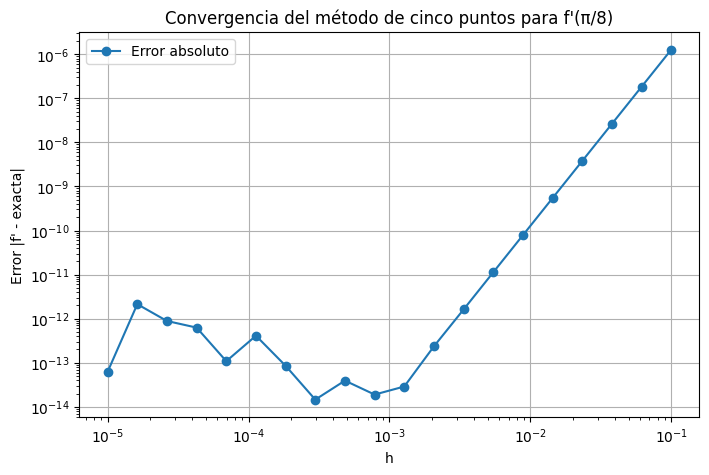

Aproximación f''(π/8) con h = 0.05: -0.9238794683673055
Valor exacto: -0.9238795325112867
Error: 6.414398123766318e-08
Aproximación f''(π/8) con h = 0.1: -0.9238785068945976
Valor exacto: -0.9238795325112867
Error: 1.0256166891320362e-06
Aproximación f''(π/8) con h = 0.01: -0.923879532409022
Valor exacto: -0.9238795325112867
Error: 1.0226475222196996e-10


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def five_point_derivative(f, x, h):
    return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12*h)

# Función a derivar
f = np.cos
x_eval = np.pi / 8

# Valores de h para comparar convergencia
hs = np.logspace(-5, -1, 20)
exact = -np.sin(x_eval)
errors = []

for h in hs:
    approx = five_point_derivative(f, x_eval, h)
    error = np.abs(approx - exact)
    errors.append(error)

# Graficar el error
plt.figure(figsize=(8,5))
plt.loglog(hs, errors, marker='o', label="Error absoluto")
plt.xlabel("h")
plt.ylabel("Error |f' - exacta|")
plt.title("Convergencia del método de cinco puntos para f'(π/8)")
plt.grid(True)
plt.legend()
plt.show()





################################3
# Segunda derivada centrada con cinco puntos
def five_point_second_derivative(f, x, h):
    return (-f(x + 2*h) + 16*f(x + h) - 30*f(x) + 16*f(x - h) - f(x - 2*h)) / (12*h**2)

# Evaluar con h = 0.05
h = 0.05
x_eval = np.pi / 8
approx_d2 = five_point_second_derivative(f, x_eval, h)
exact_d2 = -np.cos(x_eval)
error_d2 = np.abs(approx_d2 - exact_d2)

print(f"Aproximación f''(π/8) con h = {h}: {approx_d2}")
print(f"Valor exacto: {exact_d2}")
print(f"Error: {error_d2}")

# h= 0.1
h = 0.1
x_eval = np.pi / 8
approx_d2 = five_point_second_derivative(f, x_eval, h)
exact_d2 = -np.cos(x_eval)
error_d2 = np.abs(approx_d2 - exact_d2)

print(f"Aproximación f''(π/8) con h = {h}: {approx_d2}")
print(f"Valor exacto: {exact_d2}")
print(f"Error: {error_d2}")

#h =0.01
h = 0.01
x_eval = np.pi / 8
approx_d2 = five_point_second_derivative(f, x_eval, h)
exact_d2 = -np.cos(x_eval)
error_d2 = np.abs(approx_d2 - exact_d2)

print(f"Aproximación f''(π/8) con h = {h}: {approx_d2}")
print(f"Valor exacto: {exact_d2}")
print(f"Error: {error_d2}")

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

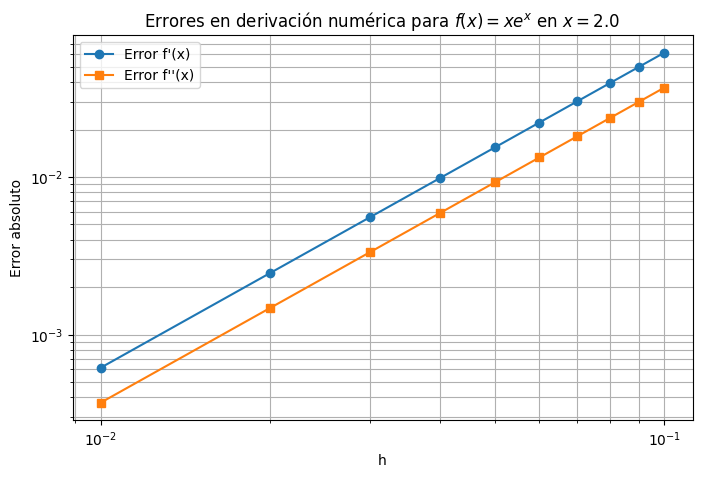

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Función simbólica y derivadas exactas
x = sp.Symbol('x')
f_expr = x * sp.exp(x)
f_derivadaexacta = sp.lambdify(x, sp.diff(f_expr, x), 'numpy')
f_2_derivadaexacta = sp.lambdify(x, sp.diff(f_expr, x, 2), 'numpy')
f_func = sp.lambdify(x, f_expr, 'numpy')

# Derivadas numéricas centradas
def derivada_centrada(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def segunda_derivada_centrada(f, x, h):
    return (f(x + h) - 2*f(x) + f(x - h)) / (h**2)

# Valores
x0 = 2.0
h_vals = np.linspace(0.01, 0.1, 10)
error_primera = []
error_segunda = []

# Cálculo de errores
for h in h_vals:
    d1 = derivada_centrada(f_func, x0, h)
    d2 = segunda_derivada_centrada(f_func, x0, h)

    error_primera.append(np.abs(d1 - f_derivadaexacta(x0)))
    error_segunda.append(np.abs(d2 - f_2_derivadaexacta(x0)))

# Gráfico de errores
plt.figure(figsize=(8,5))
plt.loglog(h_vals, error_primera, 'o-', label="Error f'(x)")
plt.loglog(h_vals, error_segunda, 's-', label="Error f''(x)")
plt.xlabel("h")
plt.ylabel("Error absoluto")
plt.title("Errores en derivación numérica para $f(x) = x e^x$ en $x=2.0$")
plt.grid(True, which='both')
plt.legend()
plt.show()
